# Exercise: Fitting a Non-Linear Function with Polynomial Regression

In this exercise, you will analyze a **univariate non-linear dataset** and determine the best polynomial fit for the function using model selection. You will evaluate the models based on the **Mean Squared Error (MSE)** on the validation set.

## Instructions
1. **Load the Dataset**:
   - Read the data from the file `non_linear_data.csv`.
   - The dataset contains two columns:
     - `x`: The independent variable.
     - `y`: The dependent variable.

2. **Visualize the Data**:
   - Create a scatter plot to visualize the relationship between `x` and `y`.

3. **Split the Data**:
   - Split the dataset into three sets: **training (60%)**, **validation (20%)**, and **test (20%)**.
   - Use the training set to train models, the validation set for model selection, and the test set for final evaluation.

4. **Fit Polynomial Models**:
   - For each degree \( d \) in \( \{1, 2, \dots, 10\} \), fit a polynomial regression model:
     - Generate polynomial features up to degree \( d \).
     - Fit the model on the training set.

5. **Evaluate Models**:
   - For each polynomial degree:
     - Compute the **MSE** on the training and validation sets.
     - Store the results for comparison.

6. **Model Selection**:
   - Identify the degree of the polynomial that results in the lowest **MSE** on the validation set.

7. **Test the Best Model**:
   - Use the test set to evaluate the performance of the selected model.
   - Compute the **MSE** on the test set.

8. **Visualize the Results**:
   - Plot the original data and the predictions of the best-fitting polynomial model.

9. **Discuss the Findings**:
   - Analyze the results and discuss how well the selected polynomial fits the data.
   - Compare the model’s performance on the validation and test sets.

## Deliverables
- A scatter plot of the data (`x` vs. `y`).
- A table showing the MSE for training and validation sets for polynomial degrees 1 to 10.
- The degree of the best-fitting polynomial based on validation MSE.
- The MSE on the test set for the best model.
- A plot showing the data points and the fitted polynomial curve for the best model.
- A short discussion of the findings.


1. **Load the data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('non_linear_data.csv')
df.head()

,x,y
0,7.303420,-0.627324
1,-0.359400,-0.009844
2,-1.292607,-0.059325
3,1.756502,0.590487
4,10.186651,-0.311829


2. **Visualization**

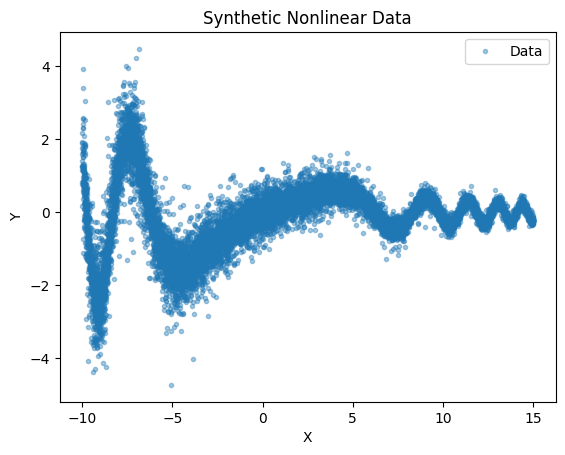

In [5]:
X = df['x']
y = df['y']

plt.plot(X, y, '.', alpha=0.4, label="Data")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Nonlinear Data")
plt.legend()
plt.show()

3. **Split the Data**:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Train/test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=7976)
train_df = train_df.sort_values("x")
test_df  = test_df.sort_values("x")

X_train = train_df[["x"]]
y_train = train_df["y"]
X_test  = test_df[["x"]]
y_test  = test_df["y"]

4. **Fit Polynomial Models**

Let's try to fit the data to a polynomial of degree **d**

Training Metrics:
  MSE: 0.6813
  R²: 0.1368
Test Metrics:
  MSE: 0.6400
  R²: 0.1560


C:\Users\V_PLANASBIELSA\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


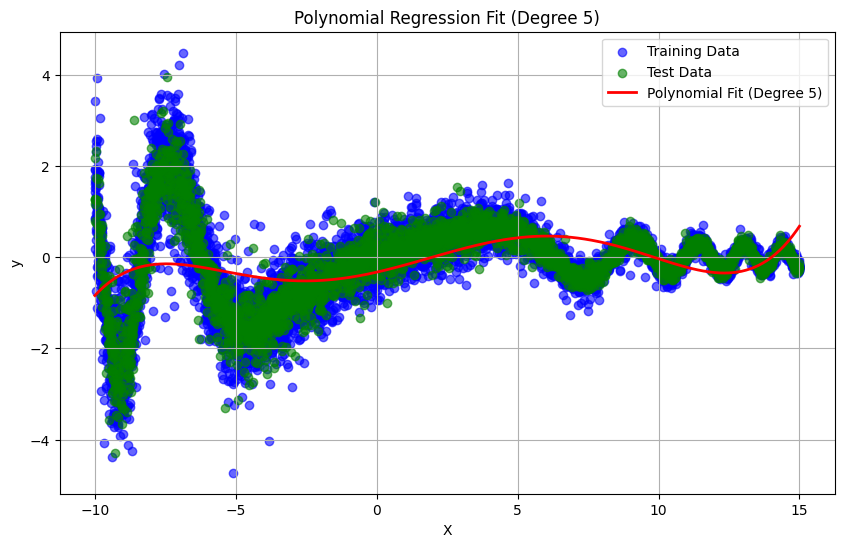

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

d= 5 #degree

poly = PolynomialFeatures(degree=d, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# Fit linear model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test  = model.predict(X_test_poly)

# Calculate MSE and R2
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)
r2_train  = r2_score(y_train, y_pred_train)
r2_test   = r2_score(y_test, y_pred_test)


# Print metrics
print(f"Training Metrics:\n  MSE: {mse_train:.4f}\n  R²: {r2_train:.4f}")
print(f"Test Metrics:\n  MSE: {mse_test:.4f}\n  R²: {r2_test:.4f}")

# Plot the fit
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test Data')

# Generate smooth curve for polynomial fit
X_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot the polynomial fit
plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial Fit (Degree {d})', linewidth=2)

# Labels and legend
plt.title(f"Polynomial Regression Fit (Degree {d})")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


5. **Evaluation**
Let's do it now for *all* the possible degrees 

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

degrees =np.arange(1,20)
results = []

for d in degrees:
    # Create polynomial features up to degree d
    poly = PolynomialFeatures(degree=d, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_poly)
    y_pred_test  = model.predict(X_test_poly)

    # Calculate MSE and R2
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test  = mean_squared_error(y_test, y_pred_test)
    r2_train  = r2_score(y_train, y_pred_train)
    r2_test   = r2_score(y_test, y_pred_test)

    results.append({
        "Degree": d,
        "MSE_Train": mse_train,
        "MSE_Test": mse_test,
        "R2_Train": r2_train,
        "R2_Test": r2_test
    })

results_df = pd.DataFrame(results)
results_df


,Degree,MSE_Train,MSE_Test,R2_Train,R2_Test
0,1,0.761565,0.719950,0.035099,0.050670
1,2,0.753017,0.707919,0.045929,0.066534
2,3,0.741130,0.694666,0.060990,0.084009
3,4,0.734636,0.685512,0.069217,0.096080
4,5,0.681322,0.640042,0.136766,0.156037
5,6,0.538087,0.500592,0.318244,0.339916
6,7,0.525965,0.486779,0.333603,0.358131
7,8,0.488466,0.453646,0.381114,0.401819
8,9,0.399909,0.373998,0.493317,0.506844
9,10,0.293429,0.278227,0.628226,0.633129


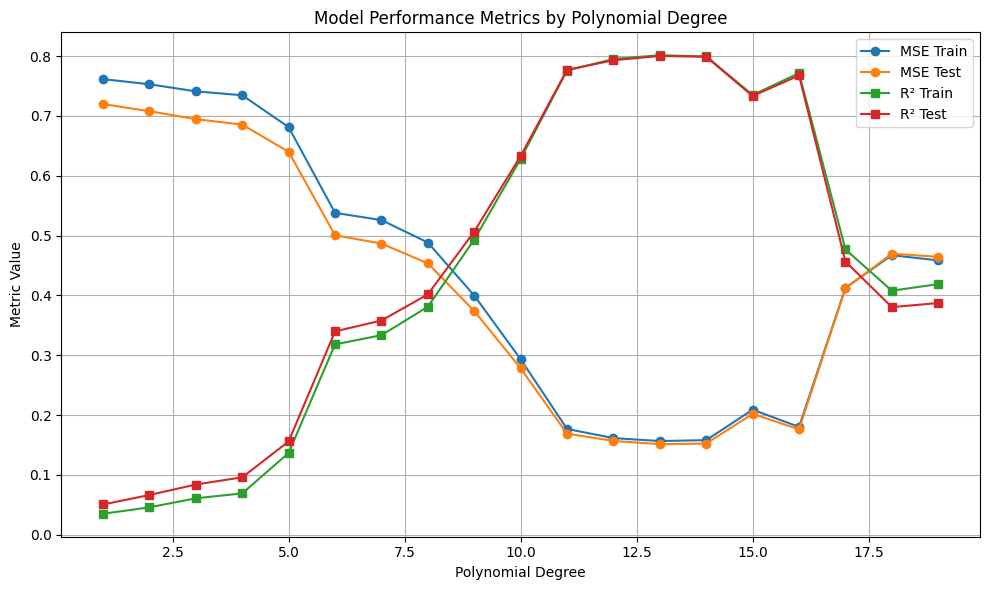

In [12]:


# Create the plot
plt.figure(figsize=(10, 6))

# Plot MSE for training and test sets
plt.plot(results_df['Degree'], results_df['MSE_Train'], label='MSE Train', marker='o')
plt.plot(results_df['Degree'], results_df['MSE_Test'], label='MSE Test', marker='o')

# Plot R² for training and test sets
plt.plot(results_df['Degree'], results_df['R2_Train'], label='R² Train', marker='s')
plt.plot(results_df['Degree'], results_df['R2_Test'], label='R² Test', marker='s')

# Add labels, title, and legend
plt.title('Model Performance Metrics by Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Visualization of some fits**

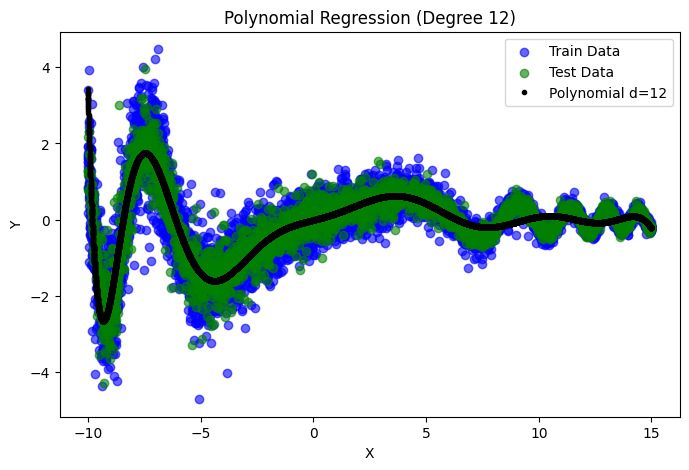

In [14]:
def plot_polynomial_fit(degree):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Train Data')
    plt.scatter(X_test, y_test, color='green', alpha=0.6, label='Test Data')


    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_plot_poly = poly.fit_transform(X.values.reshape(-1, 1))
    model = LinearRegression().fit(poly.fit_transform(X_train), y_train)
    y_plot_pred = model.predict(X_plot_poly)

    plt.plot(X, y_plot_pred, 'k.', label=f"Polynomial d={degree}")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# Example: Plot degree 3 fit
plot_polynomial_fit(degree=12)


5. **Evaluation using Cross Validation**

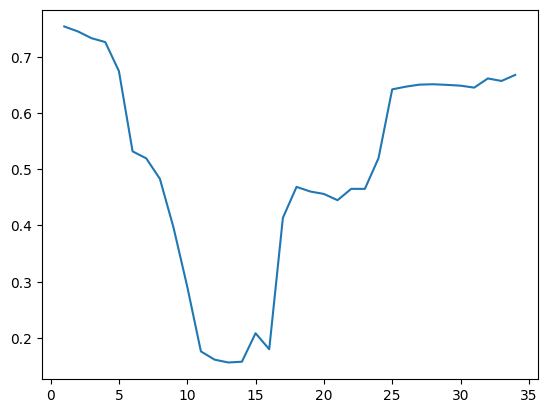

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=7976)

def cross_val_mse(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    mse_list = []

    for train_index, val_index in kf.split(df):
        train_fold = df.iloc[train_index]
        val_fold   = df.iloc[val_index]

        X_train_fold = train_fold[["x"]]
        y_train_fold = train_fold["y"]
        X_val_fold   = val_fold[["x"]]
        y_val_fold   = val_fold["y"]

        # Transform
        X_train_poly = poly.fit_transform(X_train_fold)
        X_val_poly   = poly.transform(X_val_fold)

        # Fit
        model = LinearRegression()
        model.fit(X_train_poly, y_train_fold)

        # Predict
        y_val_pred = model.predict(X_val_poly)
        mse_list.append(mean_squared_error(y_val_fold, y_val_pred))
    
    return np.mean(mse_list)

degrees = np.arange(1,35)
cv_results = []
for d in degrees:
    cv_mse = cross_val_mse(d)
    cv_results.append({"Degree": d, "CV_MSE": cv_mse})

cv_results_df = pd.DataFrame(cv_results)
cv_results_df
plt.plot(cv_results_df.Degree, cv_results_df.CV_MSE, '-')


6. **Model selection**

It seemd like the right polynomial is order ~13. let's see the bets model in this case

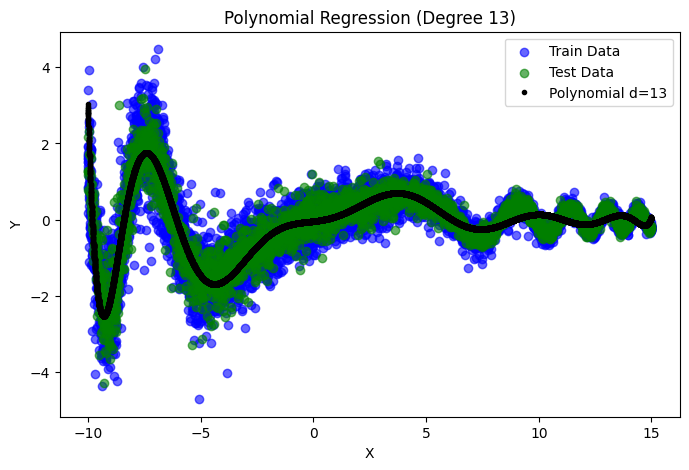

In [18]:
# Example: Plot degree 3 fit
plot_polynomial_fit(degree=13)

This is the best we can do, but it is not great. Let's look at the resiual


In [20]:
degree = 13


poly = PolynomialFeatures(degree=degree, include_bias=True)

X_train_poly = poly.fit_transform(X_train)  # Fit and transform training data
X_test_poly = poly.transform(X_test) 


# Fit the model on the training data
model = LinearRegression().fit(X_train_poly, y_train)

# Compute predictions for training and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
 
# Compute residuals for training and test sets
res_train = y_train - y_train_pred  # Training residuals
res_test = y_test - y_test_pred     # Test residuals

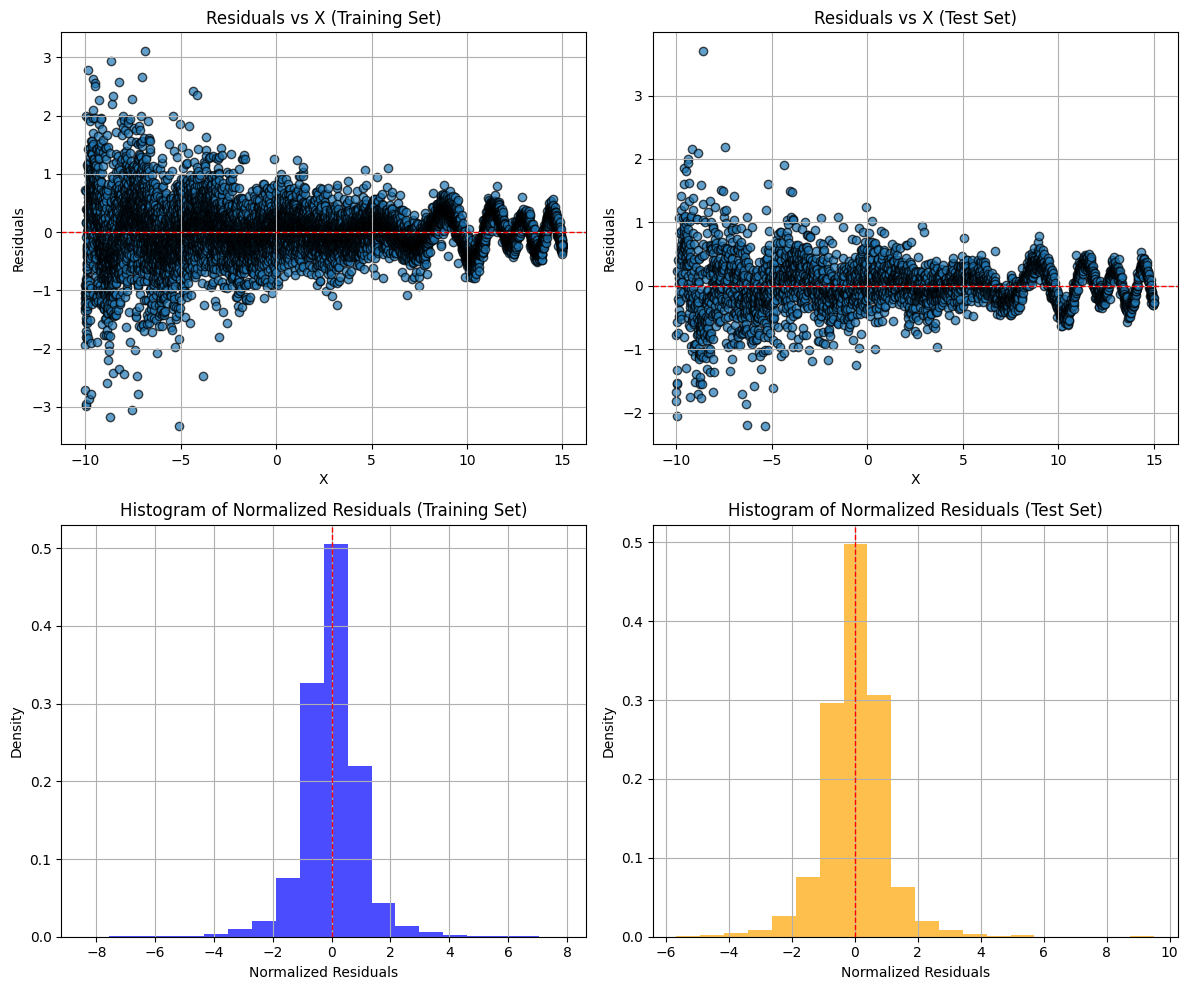

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize residuals
res_train_normalized = (res_train - np.mean(res_train)) / np.std(res_train)
res_test_normalized = (res_test - np.mean(res_test)) / np.std(res_test)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Residuals vs. X for training set
axes[0, 0].scatter(X_train, res_train, alpha=0.7, edgecolor='k', label='Residuals')
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_title('Residuals vs X (Training Set)')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)

# Top-right: Residuals vs. X for test set
axes[0, 1].scatter(X_test, res_test, alpha=0.7, edgecolor='k', label='Residuals')
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_title('Residuals vs X (Test Set)')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True)

# Bottom-left: Histogram of residuals for training set
axes[1, 0].hist(res_train_normalized, bins=20, alpha=0.7, color='blue', density=True, label='Training Residuals')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=1)
axes[1, 0].set_title('Histogram of Normalized Residuals (Training Set)')
axes[1, 0].set_xlabel('Normalized Residuals')
axes[1, 0].set_ylabel('Density')
axes[1, 0].grid(True)

# Bottom-right: Histogram of residuals for test set
axes[1, 1].hist(res_test_normalized, bins=20, alpha=0.7, color='orange', density=True, label='Test Residuals')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_title('Histogram of Normalized Residuals (Test Set)')
axes[1, 1].set_xlabel('Normalized Residuals')
axes[1, 1].set_ylabel('Density')
axes[1, 1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Use kurtosis as super basic test to test normaliy of residuals

In [23]:
from scipy.stats import kurtosis

# Compute kurtosis for residuals
kurt_res_train = kurtosis(res_train, fisher=True)  # Fisher=True gives excess kurtosis (subtracts 3)
kurt_res_test = kurtosis(res_test, fisher=True)

# Print results
print(f"Kurtosis of Training Residuals: {kurt_res_train:.4f}")
print(f"Kurtosis of Test Residuals: {kurt_res_test:.4f}")


Kurtosis of Training Residuals: 6.6155
Kurtosis of Test Residuals: 5.9338


For distibution to be normally distributed, the kurtosis must be close to 3L in this case, we have fat tails (more extreme values than expected).

Other test are more sophisticated , for instabce Shapiro-Wilk test.
- Null hypothesis $(H_0)$: the data in normally distibuted/
- Alternative hypothesis $(H_1)$: The data is not normally distributed.

Result of the test, a $p-value$
- if $p-value 0.05$ reject $H_0$ (data is not normally distributed)
- if $p \geq 0.05$ fail to reject $H_0$ (maybe it is normally distributed after all...)

In [30]:
from scipy.stats import shapiro

# Test for normality
stat_train, p_train = shapiro(res_train)
stat_test, p_test = shapiro(res_test)

# Print results
print("Shapiro-Wilk Test:")
print(f"  Training Residuals: Statistic={stat_train:.4f}, p-value={p_train:.4f}")
print(f"  Test Residuals: Statistic={stat_test:.4f}, p-value={p_test:.4f}")


Shapiro-Wilk Test:
  Training Residuals: Statistic=0.9272, p-value=0.0000
  Test Residuals: Statistic=0.9397, p-value=0.0000


C:\Users\V_PLANASBIELSA\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16000.
  res = hypotest_fun_out(*samples, **kwds)


## What about nonparametric methods in Python?
Let's see how to implement (using libraries)
- splines
- knn (k-nearest neighborgh)
- regresion trees
- LOWESS (Locally Weighted Scatterplot Smoothing)

### Splines.

Implementing splines using sklearn is quite simple. 

Remember that splies tries to approximate a polynomial by segments. We can decide 2 things, the size of the segments (characterized by how many **knots** or cuts we want to use) and the degree of the polynomial withi each segment. These two parameter are" specified in the line

> `spline = SplineTransformer(n_knots=20, degree=1)`

In the standard algorithm, **k** knots identify tipically **k+1** segments of equal size. Some more sophisticated imlplementations use an adaptative segmentation, in which the **k** knots devide the data in **k+1** segment of equal data size. 


C:\Users\V_PLANASBIELSA\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


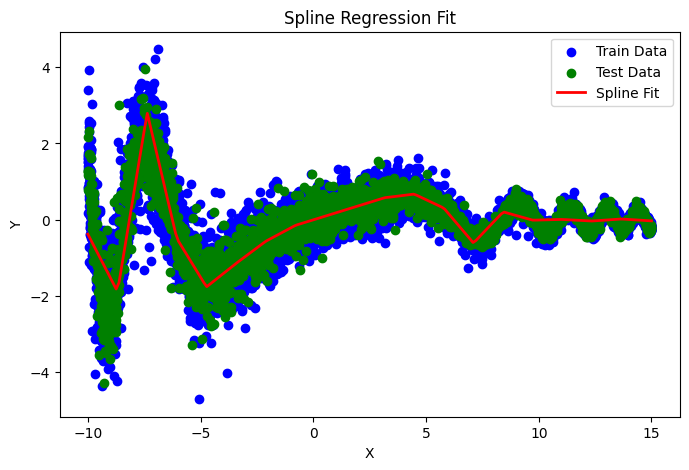

In [45]:
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# Example: SplineTransformer -> LinearRegression
spline = SplineTransformer(n_knots=20, degree=1)
X_train_spline = spline.fit_transform(X_train)
X_test_spline  = spline.transform(X_test)

model = LinearRegression()
model.fit(X_train_spline, y_train)

# Predictions
y_pred = model.predict(X_test_spline)


# 1. Plot the training and test points
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.scatter(X_test, y_test, color='green', label="Test Data")

# 2. Create a smooth grid of x-values
#    e.g., from min(X_train,X_test) to max(X_train,X_test)
x_min = min(X_train.min())
x_max = max(X_train.max())
X_grid = np.linspace(x_min, x_max, 200).reshape(-1, 1)

# 3. Transform X_grid through the same spline
X_grid_spline = spline.transform(X_grid)

# 4. Predict using the trained model
y_grid_pred = model.predict(X_grid_spline)

# 5. Plot the spline regression curve
plt.plot(X_grid, y_grid_pred, color='red', label="Spline Fit", linewidth=2)

plt.title("Spline Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


### KNN (K-Nearest Neighbors) 
This technique will be discussed in more detail in the context of classification. 

KNN regression predicts the value of a target variable by averaging the values of its k nearest neighbors in the feature space, where "nearest" is determined by a distance metric (e.g., Euclidean distance). It is a non-parametric method that makes no assumptions about the underlying data distribution. The model's performance depends on the choice of **k** and the scaling of features. The **ki** pâraùmeter is specified in the line

`knn_reg = KNeighborsRegressor(n_neighbors=N )`

---- KNN Regression ----
Test MSE: 0.11135062852334636
Test R^2: 0.8531724106010627


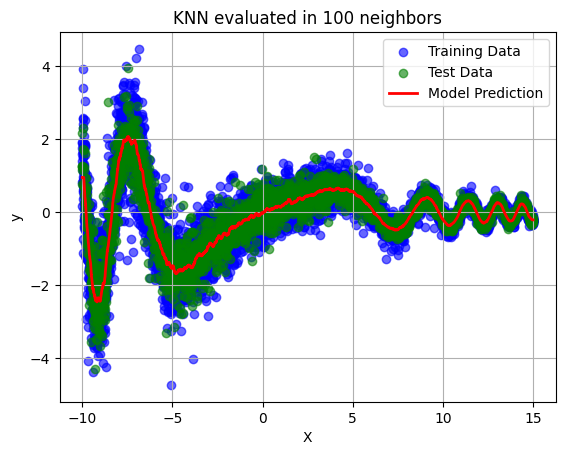

In [60]:
from sklearn.neighbors import KNeighborsRegressor
N = 100

# Instantiate and fit
knn_reg = KNeighborsRegressor(n_neighbors=N )
knn_reg.fit(X_train, y_train)

# Evaluate on test
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn  = r2_score(y_test, y_pred_knn)
print("---- KNN Regression ----")
print("Test MSE:", mse_knn)
print("Test R^2:", r2_knn)

# Plot

# Plot the training data
plt.scatter(X_train, y_train, color="blue", label="Training Data", alpha=0.6)

# Plot the test data
plt.scatter(X_test, y_test, color="green", label="Test Data", alpha=0.6)

# Plot the predicted curve
plt.plot(X_test, y_pred_knn, color="red", label="Model Prediction", linewidth=2)

# Customize plot
plt.title(f'KNN evaluated in {N} neighbors')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### LOWESS (Locally Weighted Scatterplot Smoothing)

**LOWESS** is a non-parametric regression method used to fit a smooth curve through a scatterplot of data. It is particularly useful when the relationship between variables is non-linear and you want to visualize the trend without assuming a specific functional form.

#### Key Features ####

**Local Regression**
- Fits multiple regressions on localized subsets of data points.
- Each regression uses a **weighted least squares method**, where closer points have higher weights.

**Flexible and Non-Parametric**
- Does not assume any global functional form (e.g., linear, polynomial).
- The curve adapts to the data, making it ideal for capturing non-linear relationships.

**Smoothing**
- The degree of smoothing is controlled by a parameter called the **span** or **bandwidth**, which determines how much of the data is used in each local regression.


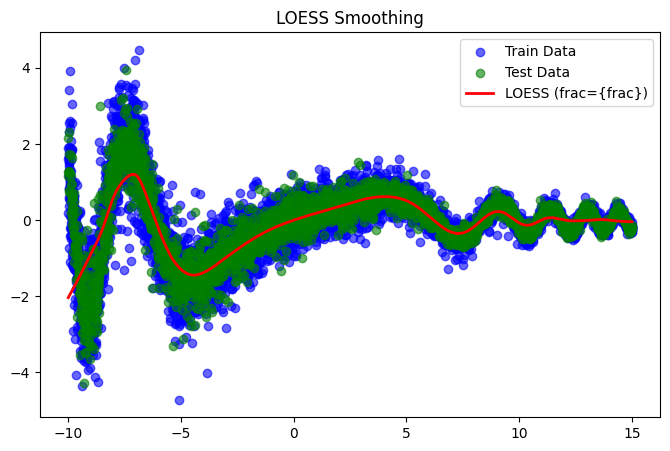

In [63]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
frac= 0.1
# We can smooth over the TRAIN data
smoothed_train = lowess(y_train, X_train.squeeze(), frac=frac)

# smoothed_train is array of shape (n, 2): [ [x_i, y_smooth_i], ...]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Train Data')
plt.scatter(X_test,  y_test,  color='green', alpha=0.6, label='Test Data')

# Sort by x for a nice line plot
smoothed_train_sorted = smoothed_train[np.argsort(smoothed_train[:,0])]
plt.plot(smoothed_train_sorted[:,0], smoothed_train_sorted[:,1], 
         color='red', linewidth=2, label="LOESS (frac={frac})")

plt.title("LOESS Smoothing")
plt.legend()
plt.show()


### Simplified Table: Comparison of KNN, Splines, and LOWESS

| **Aspect**              | **KNN Regression**                                                                               | **Splines**                                                                                          | **LOWESS**                                                                                           |
|--------------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Purpose**             | Predicts a target value by averaging the values of nearby points (neighbors).                    | Fits piecewise polynomials to data with smooth transitions between segments.                         | Smooths data by fitting locally weighted regressions without a global functional form.               |
| **Feature Scaling**     | Required for accurate distance measurement.                                                     | Not required; operates in original feature space.                                                   | Not required; works on original scale but sensitive to span parameter.                              |
| **Output**              | A single predicted value for the target variable.                                               | A smooth, continuous function over the data.                                                        | A smooth, flexible curve capturing local data trends.                                                |
| **Control Parameters**  | \( k \): Number of neighbors.                                                                   | Number and placement of knots; polynomial degree.                                                    | Span (bandwidth): Fraction of data used for local fits.                                              |
| **Complexity**          | High for large datasets due to distance calculations.                                           | Moderate; depends on the number of knots and polynomial degree.                                     | High; involves iterative local regressions, especially for large datasets.                          |
| **Advantages**          | - Simple, easy to implement.<br>- Works well for small datasets.                                | - Flexible for structured data.<br>- Ensures smoothness at transitions.                             | - Captures non-linear trends.<br>- No assumptions about global data structure.                      |
| **Disadvantages**       | - Sensitive to \( k \) and scaling.<br>- Struggles in high dimensions.                          | - Requires careful knot placement.<br>- Risk of overfitting if knots are too dense.                 | - Computationally expensive.<br>- Not suitable for large datasets.<br>- Hard to generalize.         |
| **When to Use**         | When the relationship is unknown, and local similarity is meaningful.                           | When the data requires structured, piecewise approximation with continuity.                         | For exploratory data analysis or smoothing non-linear relationships.                                |
| **When Not to Use**     | - For large datasets or high-dimensional data (curse of dimensionality).                        | - When the data lacks clear segmentation or structure.                                               | - For predictive modeling on large datasets.<br>- When computational efficiency is critical.         |
